In [28]:
from keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [29]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [30]:
x_Train4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [31]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [32]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [34]:
model = Sequential()

model.add(Conv2D(
    filters=16,
    kernel_size=(5,5),
    padding='same',
    input_shape=(28,28,1),
    activation='relu'

))

d:\Program\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [35]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [36]:
model.add(Conv2D(
    filters=36,
    kernel_size=(5,5),
    padding='same',
    activation='relu'

))

In [37]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [38]:
model.add(Dropout(0.25))

In [39]:
model.add(Flatten())

In [40]:
model.add(Dense(128, activation='relu'))

In [41]:
model.add(Dropout(0.5))

In [42]:
model.add(Dense(10, activation='softmax'))

In [43]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 36)     │        14,436 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 36)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 36)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1764)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       225,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,062 (945.55 KB)

 Trainable params: 242,062 (945.55 KB)

 Non-trainable params: 0 (0.00 B)

None


In [44]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [45]:
train_history = model.fit(
    x = x_Train4D_normalize,
    y = y_TrainOneHot,
    validation_split=0.2,
    epochs=10,
    batch_size=300,
    verbose=2
    )

Epoch 1/10


160/160 - 7s - 41ms/step - accuracy: 0.8509 - loss: 0.4789 - val_accuracy: 0.9727 - val_loss: 0.0944
Epoch 2/10
160/160 - 5s - 31ms/step - accuracy: 0.9612 - loss: 0.1304 - val_accuracy: 0.9811 - val_loss: 0.0618
Epoch 3/10
160/160 - 5s - 30ms/step - accuracy: 0.9708 - loss: 0.0968 - val_accuracy: 0.9841 - val_loss: 0.0496
Epoch 4/10
160/160 - 6s - 35ms/step - accuracy: 0.9760 - loss: 0.0788 - val_accuracy: 0.9880 - val_loss: 0.0435
Epoch 5/10
160/160 - 6s - 35ms/step - accuracy: 0.9803 - loss: 0.0653 - val_accuracy: 0.9861 - val_loss: 0.0436
Epoch 6/10
160/160 - 5s - 32ms/step - accuracy: 0.9822 - loss: 0.0571 - val_accuracy: 0.9887 - val_loss: 0.0384
Epoch 7/10
160/160 - 5s - 34ms/step - accuracy: 0.9846 - loss: 0.0509 - val_accuracy: 0.9902 - val_loss: 0.0366
Epoch 8/10
160/160 - 5s - 32ms/step - accuracy: 0.9850 - loss: 0.0479 - val_accuracy: 0.9896 - val_loss: 0.0363
Epoch 9/10
160/160 - 5s - 33ms/step - accuracy: 0.9865 - loss: 0.0431 - val_accuracy: 0.9909 - val_loss: 0.0331
Epo

In [46]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

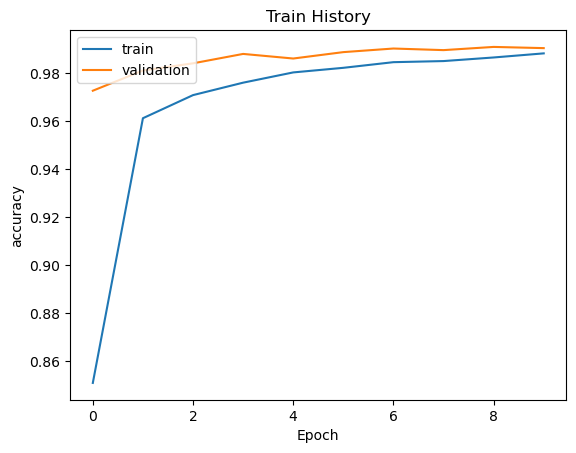

In [47]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

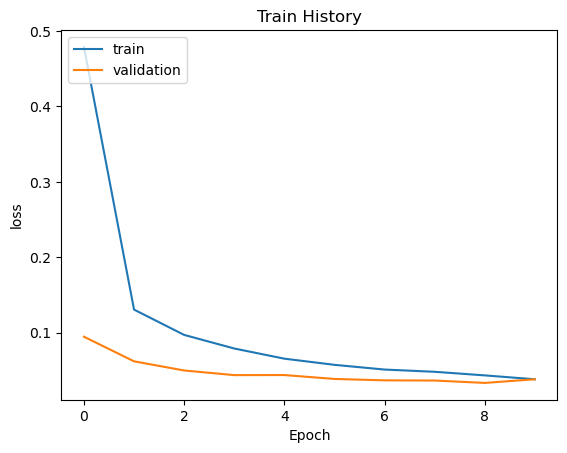

In [48]:
show_train_history(train_history, 'loss', 'val_loss')

In [49]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9889 - loss: 0.0315


0.9908999800682068

In [74]:
prediction = model.predict(x_Test4D_normalize)
predicted_labels = np.argmax(prediction, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


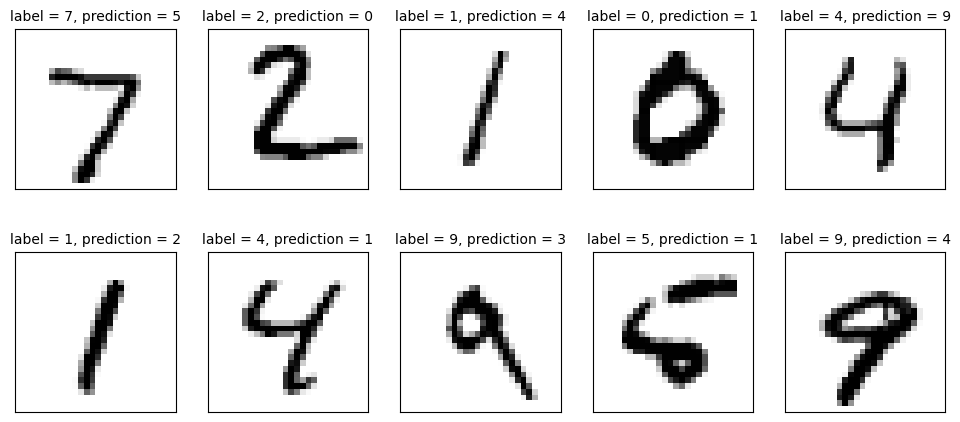

In [75]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)

    if num>25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap = 'binary')
        title = "label = " + str(labels[idx])
        if len(prediction_labels)>0:
            title += ", prediction = " + str(prediction_labels[idx])
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

plot_images_labels_prediction(x_Test, y_Test, prediction, idx = 0)

In [76]:
print("y_Test shape:", y_Test.shape)
print("prediction_labels shape:", prediction_labels.shape)

y_Test shape: (10000,)
prediction_labels shape: (60000,)


In [78]:
prediction_labels = np.argmax(prediction, axis=1)
y_Test = y_Test[:len(prediction_labels)]  # 將 y_Test 截斷為與 prediction_labels 相同的長度

import pandas as pd
confusion_matrix = pd.crosstab(y_Test, prediction_labels, rownames=['label'], colnames=['predict'])
print(confusion_matrix)

predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        977     0     0     0    0    0    2     1    0    0
1          0  1132     2     0    0    0    1     0    0    0
2          1     0  1028     0    0    0    0     3    0    0
3          1     0     2  1001    0    3    0     1    2    0
4          0     0     0     0  981    0    1     0    0    0
5          2     0     0     4    0  881    4     1    0    0
6          3     2     0     0    1    1  951     0    0    0
7          0     3     7     0    1    0    0  1015    1    1
8          3     1     2     2    0    1    1     2  960    2
9          4     4     2     0    9    2    0     4    1  983
